## Preprocessing

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df.head() 

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [21]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [22]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
print(application_count)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [23]:
list(application_count.loc[application_count < 500].index)

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17']

In [24]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count.loc[application_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [25]:
classification_count = application_df['CLASSIFICATION'].value_counts()

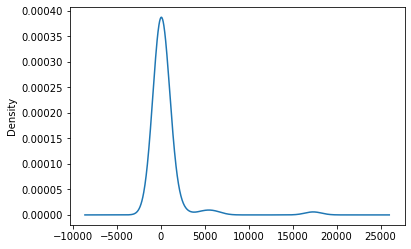

In [26]:
# Look at CLASSIFICATION value counts for binning
classification_count.plot.density()

In [27]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count.loc[classification_count < 1000]

C7000    777
C1700    287
C4000    194
C5000    116
C1270    114
        ... 
C1245      1
C2170      1
C2500      1
C1570      1
C3700      1
Name: CLASSIFICATION, Length: 66, dtype: int64

In [28]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count.loc[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
# Split our preprocessed data into our features and target arrays
y = numeric_df.pop('IS_SUCCESSFUL')
X = numeric_df

In [31]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = 43, activation = 'relu' , input_dim = 43)) 

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = 43, activation = 'relu' , input_dim = 43)) 

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_7 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 44        
Total params: 3,828
Trainable params: 3,828
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
callback = tf.keras.callbacks.ModelCheckpoint(save_freg = "epoch", period=5)

In [38]:
# Train the model
fit_model = nn_model.fit(X_train_scaled , y_train , epochs = 100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5736 - accuracy: 0.7189
Epoch 2/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5559 - accuracy: 0.7310
Epoch 3/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5535 - accuracy: 0.7306
Epoch 4/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5507 - accuracy: 0.7317
Epoch 5/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5508 - accuracy: 0.7324
Epoch 6/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5495 - accuracy: 0.7329
Epoch 7/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5492 - accuracy: 0.7334
Epoch 8/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5477 - accuracy: 0.7339
Epoch 9/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5471 - accuracy: 0.7338
Epoch

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5585 - accuracy: 0.7252
Loss: 0.5585400068447124, Accuracy: 0.7252478003501892


In [43]:
# Export our model to HDF5 file
nn_model.save('Resources/AlphabetSoupCharity_Optimization.h5')